## P452 END-SEMESTER EXAM

Gayathri K, 2011067

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import library as lib
from prettytable import PrettyTable

### QUESTION 1

In [5]:
#reading the input file and storing columns as a list
data = np.loadtxt("endsemfit.txt")
t_list = data[:,0]
N_list = data[:,1]
uncertainty_list_N = data[:,2]

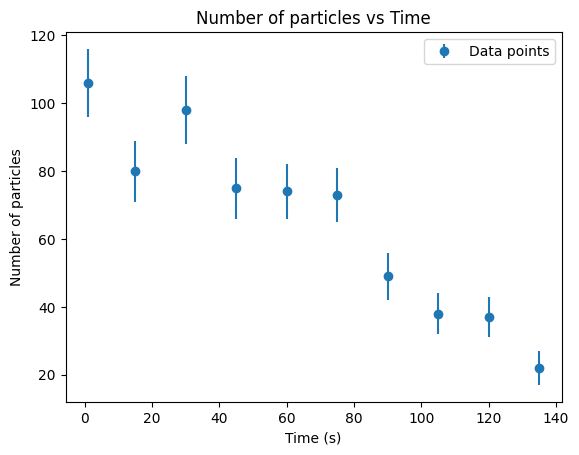

[106.  80.  98.  75.  74.  73.  49.  38.  37.  22.]


In [6]:
#plotting the data points
plt.errorbar(t_list, N_list, yerr = uncertainty_list_N, fmt = 'o', label = 'Data points')
plt.xlabel('Time (s)')
plt.ylabel('Number of particles')
plt.title('Number of particles vs Time')
plt.legend()
plt.show()
print(N_list)

In [7]:
def linear_fit(xlist: list,ylist: list,elist: list):
    
    # Raise an error if the lengths of xlist, ylist, and elist are not the same
    if len(xlist) != len(ylist):
        raise ValueError('The length of xlist, ylist, and elist must be the same')
    
    # If elist is False, assume that the error is 1 for all data points
    if elist is None:
        elist = [1]*len(xlist)
    # Convert the lists to numpy arrays
    xlist = np.array(xlist)
    ylist = np.array(ylist)
    elist = np.array(elist)
    n=len(xlist)
    # Calculate the sums
    S=np.sum(1/((elist)**2))
    Sx = np.sum(xlist/((elist)**2))
    Sy = np.sum(ylist/((elist)**2))
    Sxx = np.sum((xlist**2)/((elist)**2))
    Syy = np.sum((ylist**2)/((elist)**2))
    Sxy = np.sum((xlist*ylist)/((elist)**2))

    # Calculate the slope and intercept
    Delta = S*Sxx - Sx**2

    intercept=(Sxx*Sy-Sx*Sxy)/Delta
    slope=(S*Sxy-Sx*Sy)/Delta
    # Calculate the error in the slope and intercept
    error_intercept = np.sqrt(Sxx/Delta)
    error_slope = np.sqrt(S/Delta)
    # cov = -Sx/Delta
    # Pearsen's correlation coefficient
    r_sq = Sxy/np.sqrt(Sxx*Syy) 

    return slope,intercept,error_slope, error_intercept






In [8]:
#next we calculate the log of the counts and the uncertainty in the log of the counts
ln_counts = np.log(N_list)
sigma_ln_counts = 1 / np.sqrt(N_list)
#now we will calculate the weighted average
weighted_time = np.sum(t_list / sigma_ln_counts**2) / np.sum(1 / sigma_ln_counts**2)
weighted_ln_counts = np.sum(ln_counts / sigma_ln_counts**2) / np.sum(1 / sigma_ln_counts**2)


In [9]:

slope, intercept, error_slope, error_intercept = linear_fit(t_list, ln_counts, sigma_ln_counts)
decay  = - slope
halflife = np.log(2) / decay

In [10]:

expected_ln_counts = intercept + slope * t_list
chi_squared = np.sum(((ln_counts - expected_ln_counts) / sigma_ln_counts)**2)


degrees_of_freedom = len(N_list) - 2  


chi_squared_critical = 15.507   #5% significance level for 8 degrees of freedom

p_value = 1 - chi_squared_critical

if chi_squared < chi_squared_critical:
    fit_acceptable = True
else:
    fit_acceptable = False

In [11]:
#print and plot the results,in a pretty table
table = PrettyTable()
table.field_names=['Parameter', 'Value']
table.add_row(['Slope', slope])
table.add_row(['Intercept', intercept])
table.add_row(['Error in Slope', error_slope])
table.add_row(['Error in Intercept', error_intercept])
table.add_row(['Chi Squared', chi_squared])
table.add_row(['Degrees of Freedom', degrees_of_freedom])
table.add_row(['Critical Chi Squared', chi_squared_critical])
table.add_row(['P Value', p_value])
table.add_row(['Fit Acceptable', fit_acceptable])
print(table)
print(r'The fit is acceptable at 5% significance level')


+----------------------+-----------------------+
|      Parameter       |         Value         |
+----------------------+-----------------------+
|        Slope         | -0.009087764739079995 |
|      Intercept       |   4.728994510251189   |
|    Error in Slope    | 0.0010104864480200628 |
|  Error in Intercept  |  0.06484300759573301  |
|     Chi Squared      |   15.372761711005197  |
|  Degrees of Freedom  |           8           |
| Critical Chi Squared |         15.507        |
|       P Value        |        -14.507        |
|    Fit Acceptable    |          True         |
+----------------------+-----------------------+
The fit is acceptable at 5% significance level


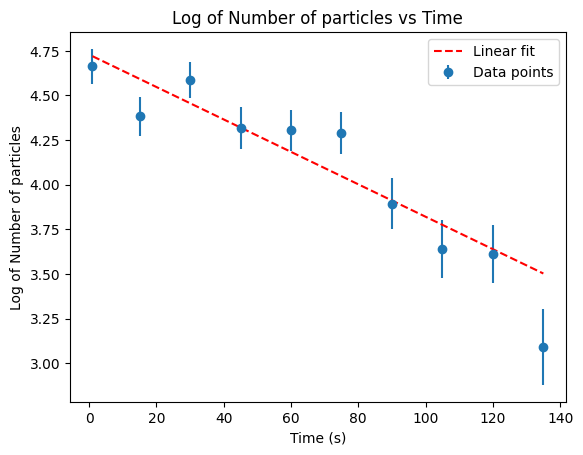

In [12]:
#plotting the linear fit
plt.errorbar(t_list, ln_counts, yerr = sigma_ln_counts, fmt = 'o', label = 'Data points')
plt.plot(t_list, expected_ln_counts, 'r--', label = 'Linear fit')
plt.xlabel('Time (s)')
plt.ylabel('Log of Number of particles')
plt.title('Log of Number of particles vs Time')
plt.legend()
plt.show()


### QUESTION 2

In [13]:
#variables
T = 300 #(K)
p = 5.95 #(in atm)
R = 0.0821
a = 6.254
b = 0.05422
#find V to an accuracy of 10^-5 for Cl_2 gas



In [14]:
def g1(V):
  
  return R*T / (p + (a / V**2))

def g2(V):
  
  return np.sqrt(((V - b)* a) / ((R*T) - p*(V - b)))



In [15]:
def fixed_point_single(g,x0,tol):
  
    x1=g(x0)
    step=1
    while abs(x1-x0)>tol:
        if step>100:
            print("The roots are not converging")
            break
        else:
            x0=x1
            x1=g(x0)
            step+=1
    return x1,step

In [16]:
guess = 1
tolerance = 1e-5
V1,step1=fixed_point_single(g1,guess,tolerance)
V2,step2=fixed_point_single(g2,guess,tolerance)
#print the results as a pretty table with proper units for the volume
table = PrettyTable()
table.field_names=['Parameter', 'Value','Steps']
table.add_row(['Volume from g1', f'{V1} L', step1])
table.add_row(['Volume from g2', f'{V2} L', step2])
print(table)







+----------------+-----------------------+-------+
|   Parameter    |         Value         | Steps |
+----------------+-----------------------+-------+
| Volume from g1 |  3.867736252116261 L  |   9   |
| Volume from g2 | 0.18568450897501665 L |   28  |
+----------------+-----------------------+-------+


### QUESTION 3

In [60]:
#prove that the solution vector of an equation Ax=b,where A is positive definite and symmetric is the minimal value of quadratic form f(x)=1/2 x^T A x - b^T x
#variables
A = np.array([[2,1],[1,2]])
b = np.array([1,2])
x = np.array([1,1])
f_x = 0.5 * np.dot(np.dot(x.T,A),x) - np.dot(b.T,x)
print(f_x)

solution = np.linalg.solve(A,b)
print(solution)

min_value = 0.5 * np.dot(np.dot(solution.T,A),solution) - np.dot(b.T,solution)
print(min_value)


0.0
[0. 1.]
-1.0


### QUESTION 4

In [59]:
#b part


# Function to calculate the Householder reflector matrix for a given vector v
def householder_reflector(v):
    v = v / np.linalg.norm(v)  # Normalize v
    n = len(v)
    P = np.eye(n) - 2 * np.outer(v, v)
    return P

# Given vectors v and x
v = np.array([1, 0])
x = np.array([1, 2])

# Step (a): Determine tau so that P becomes orthogonal
tau = 2 / np.linalg.norm(v)**2

# Step (b): Compute the Householder reflector matrix P
P = householder_reflector(v)

# Compute P*x to get the reflected vector
Px = np.dot(P, x)

# Print results
print("Householder reflector matrix P:")
print(P)
print("\nReflected vector Px:")
print(Px)



Householder reflector matrix P:
[[-1.  0.]
 [ 0.  1.]]

Reflected vector Px:
[-1.  2.]


### QUESTION 5

In [17]:
matrix = np.loadtxt("endsemmat.txt")
print(matrix)


[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]


In [18]:
def power_iteration(matrix, num_iterations=1000):
    n = matrix.shape[0]
    x = np.random.rand(n)
    for _ in range(num_iterations):
        x = np.dot(matrix, x)
        x = x / np.linalg.norm(x)
    eigenvalue = np.dot(x, np.dot(matrix, x))
    return eigenvalue, x
def normalize(vector):
    return vector / np.linalg.norm(vector)

In [19]:
a = c = -1
b = 2
n = matrix.shape[0]

eigenvalues = []
eigenvectors = []

for k in range(1, 3):  # calculate first two largest eigenvalues and eigenvectors
    eigenvalue_k, eigenvector_k = power_iteration(matrix)
    eigenvalues.append(eigenvalue_k)
    eigenvectors.append(normalize(eigenvector_k))

#verify that all of them satisfy

for k in range(2):
    lambda_k = b + 2 * np.sqrt(a * c) * np.cos((k+1) * np.pi / (n+1))
    v_ik = 2 * np.sqrt(c / a) * np.sin((k+1) * np.arange(1, n+1) * np.pi / (n+1))
    print(f"Verification for Eigenvalue {k+1}: {np.isclose(eigenvalues[k], lambda_k)}")
    print(f"Verification for Eigenvector {k+1}: {np.allclose(eigenvectors[k], v_ik)}")


Verification for Eigenvalue 1: True
Verification for Eigenvector 1: False
Verification for Eigenvalue 2: False
Verification for Eigenvector 2: False


In [20]:
#print all eigenvalues,eigenvectors and verification in a pretty table
table = PrettyTable()
table.field_names=['Eigenvalue', 'Eigenvector']
for i in range(2):
    table.add_row([eigenvalues[i], eigenvectors])
print(table)



+--------------------+------------------------------------------------------------------------------------------------------------------------------------------------------+
|     Eigenvalue     |                                                                     Eigenvector                                                                      |
+--------------------+------------------------------------------------------------------------------------------------------------------------------------------------------+
| 3.7320508075688776 | [array([ 0.28867513, -0.5       ,  0.57735027, -0.5       ,  0.28867513]), array([ 0.28867513, -0.5       ,  0.57735027, -0.5       ,  0.28867513])] |
| 3.7320508075688767 | [array([ 0.28867513, -0.5       ,  0.57735027, -0.5       ,  0.28867513]), array([ 0.28867513, -0.5       ,  0.57735027, -0.5       ,  0.28867513])] |
+--------------------+------------------------------------------------------------------------------------------------------------

### QUESTION 6 

In [40]:
a = 2

def pdf(x):
    return 0.5 * (a**2 - x **2)

def g(x):
    
    return np.sqrt(2 / np.pi) * np.exp(-x**2 / 2)

c = np.e * np.sqrt(np.pi / 2)


seed = 1
N = 10000

rand_instance = lib.randgen(seed)

def accept_reject(n):
    samples = []
    while len(samples) < n:
        
        x = np.random.normal(0, 1) # generate a random number from gaussian distribution
        
        u = rand_instance.gen()
        if u <= pdf(x) / (c * g(x)):
            samples.append(x)
    return np.array(samples)

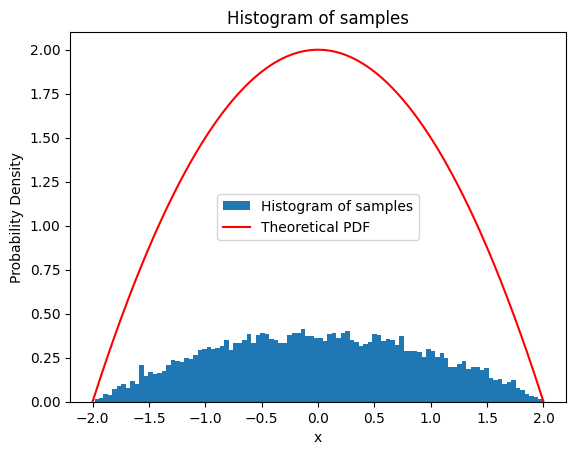

In [41]:
#generate 10000 samples
samples = accept_reject(N)
#plot the histogram of the samples
plt.hist(samples, bins=100, density=True, label='Histogram of samples')
x = np.linspace(-2, 2, 1000)
plt.plot(x, pdf(x), 'r-', label='Theoretical PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Histogram of samples')
plt.legend()
plt.show()


Here we can see that the generated points are well within the theoretical pdf.

### QUESTION 7

In [54]:
def trial_wavefunction(x, a):
    return np.where(np.abs(x) <a, (0.5 *(a**2 - x**2)), 0)

#defining a function for potential and kinetic energies
def potential_energy(x):
    return 0.5 * x**2

def local_energy(x, a):
    kinetic_energy = -0.5 * (a**2 - x**2) * trial_wavefunction(x, a)
    potential = potential_energy(x)
    return kinetic_energy + potential




In [55]:

def accept_reject_algorithm(x, a, delta, num_steps):
    accepted_samples = []
    current_x = x
    for _ in range(num_steps):
        proposed_x = current_x + np.random.uniform(-delta, delta)
        acceptance_ratio = (trial_wavefunction(proposed_x, a) ** 2) / (trial_wavefunction(current_x, a) ** 2)
        if np.random.uniform(0, 1) < acceptance_ratio:
            current_x = proposed_x
        accepted_samples.append(current_x)
    return np.array(accepted_samples)




In [56]:

def variational_monte_carlo(num_a_values, num_steps, delta):
    a_values = np.linspace(0.1, 2, num_a_values)
    energies = []
    for a in a_values:
        # Initial position
        x_0 = np.random.uniform(-5, 5)
        samples = accept_reject_algorithm(x_0, a, delta, num_steps)
        local_energies = np.array([local_energy(sample, a) for sample in samples])
        energy = np.mean(local_energies)
        energies.append(energy)
    return a_values, energies

num_a_values = 20
num_steps = 20000  # 20k Monte Carlo steps
delta = 1.0  # Step size for Metropolis-Hastings algorithm

a_values, energies = variational_monte_carlo(num_a_values, num_steps, delta)


min_energy_index = np.argmin(energies)
min_energy = energies[min_energy_index]
optimal_a = a_values[min_energy_index]



/tmp/ipykernel_103908/2429104215.py:6: RuntimeWarning: invalid value encountered in scalar divide
  acceptance_ratio = (trial_wavefunction(proposed_x, a) ** 2) / (trial_wavefunction(current_x, a) ** 2)
/tmp/ipykernel_103908/2429104215.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  acceptance_ratio = (trial_wavefunction(proposed_x, a) ** 2) / (trial_wavefunction(current_x, a) ** 2)


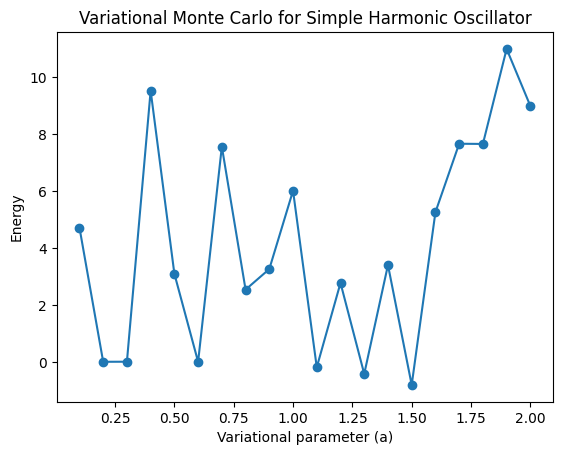

In [57]:

# Plot the energy curve
plt.plot(a_values, energies, 'o-')
plt.xlabel('Variational parameter (a)')
plt.ylabel('Energy')
plt.title('Variational Monte Carlo for Simple Harmonic Oscillator')
plt.show()


In [58]:
print("Results of variational Monte Carlo:")
print("Optimal variational parameter (a):", optimal_a)
print("Minimum energy:", min_energy)

Results of variational Monte Carlo:
Optimal variational parameter (a): 1.5
Minimum energy: -0.8102346973468194


In [61]:
def variational_monte_carlo(f_for_energy, prob_r, r0, r_step, alpha_range, N, rand_instance_for_config_change = None, rand_instance_for_acceptance = None):
    # alpha range = (alpha_min, alpha_max)
    # f_for_energy = f(r, alpha)
    # prob_r = prob(r, alpha)
    # r0 = initial r
    # r_step = step size for r
    # N = number of steps
    # rand_instance_for_config_change = random number generator for new configurations
    # rand_instance_for_acceptance = random number generator for acceptance
    
    initial_r = r_0
    alpha_list = np.linspace(alpha_range[0], alpha_range[1], 30)
    energy_list = []
    
    for i in alpha_list:
        curr_alpha = i
        
        r_0 = initial_r
        r_vals = [r_0]
        
        for i in range(N):
            r_new = r0 + r_step * rand_instance_for_config_change.gen()
            curr_prob = np.min([1, prob_r(r_new, curr_alpha) / prob_r(r0, curr_alpha)])
            if rand_instance_for_acceptance.gen() < curr_prob:
                r0 = r_new
            r_vals.append(r0)
            
        avg_energy = np.mean([f_for_energy(r, curr_alpha) for r in r_vals])
        energy_list.append(avg_energy)
    
    min_idx = np.argmin(energy_list)
    optimal_alpha = alpha_list[min_idx]
    
    return optimal_alpha, (alpha_list, energy_list)